# Surprise Housing
                                                                                                            - Jordan Dias

#### Problem Statement:
A US-based housing company named `Surprise Housing` has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data Visualisation 
3. Data Cleaning
    - Imputing null values
    - Imputing zeroes
3. Data preparation
4. Splitting the Data into Train and Test Sets
5. Model building and evaluation
    - Linear Regression
    - Lasso Regression
    - RFE
    - Ridge Regression
    - Evaluation

## 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
houses = pd.read_csv("train.csv", encoding = "ISO-8859-1")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Let's take a look at the first few rows
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We want to predict the `SalePrice` of the houses. Hence, `SalePrice` is out target variable.

Let us describe our dataset to get an idea about distribution of values of various features.

In [7]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


We can observe
- few columns are `Year` columns. We can convert these columns to `Age`.
- most columns have a huge difference between 75th and 100th quartile. These columns are `Right-skewed`.
- there exist columns having values as `0` up until 75th quartile. This suggest there can be columns with large amount of `0` data.

In [8]:
# Let's look at the number of rows and columns in the dataset
houses.shape

(1460, 81)

## 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Numerical columns

Let us plot some of the numerical varibles to visualize the spread of data and check for multicollinearity among the features.

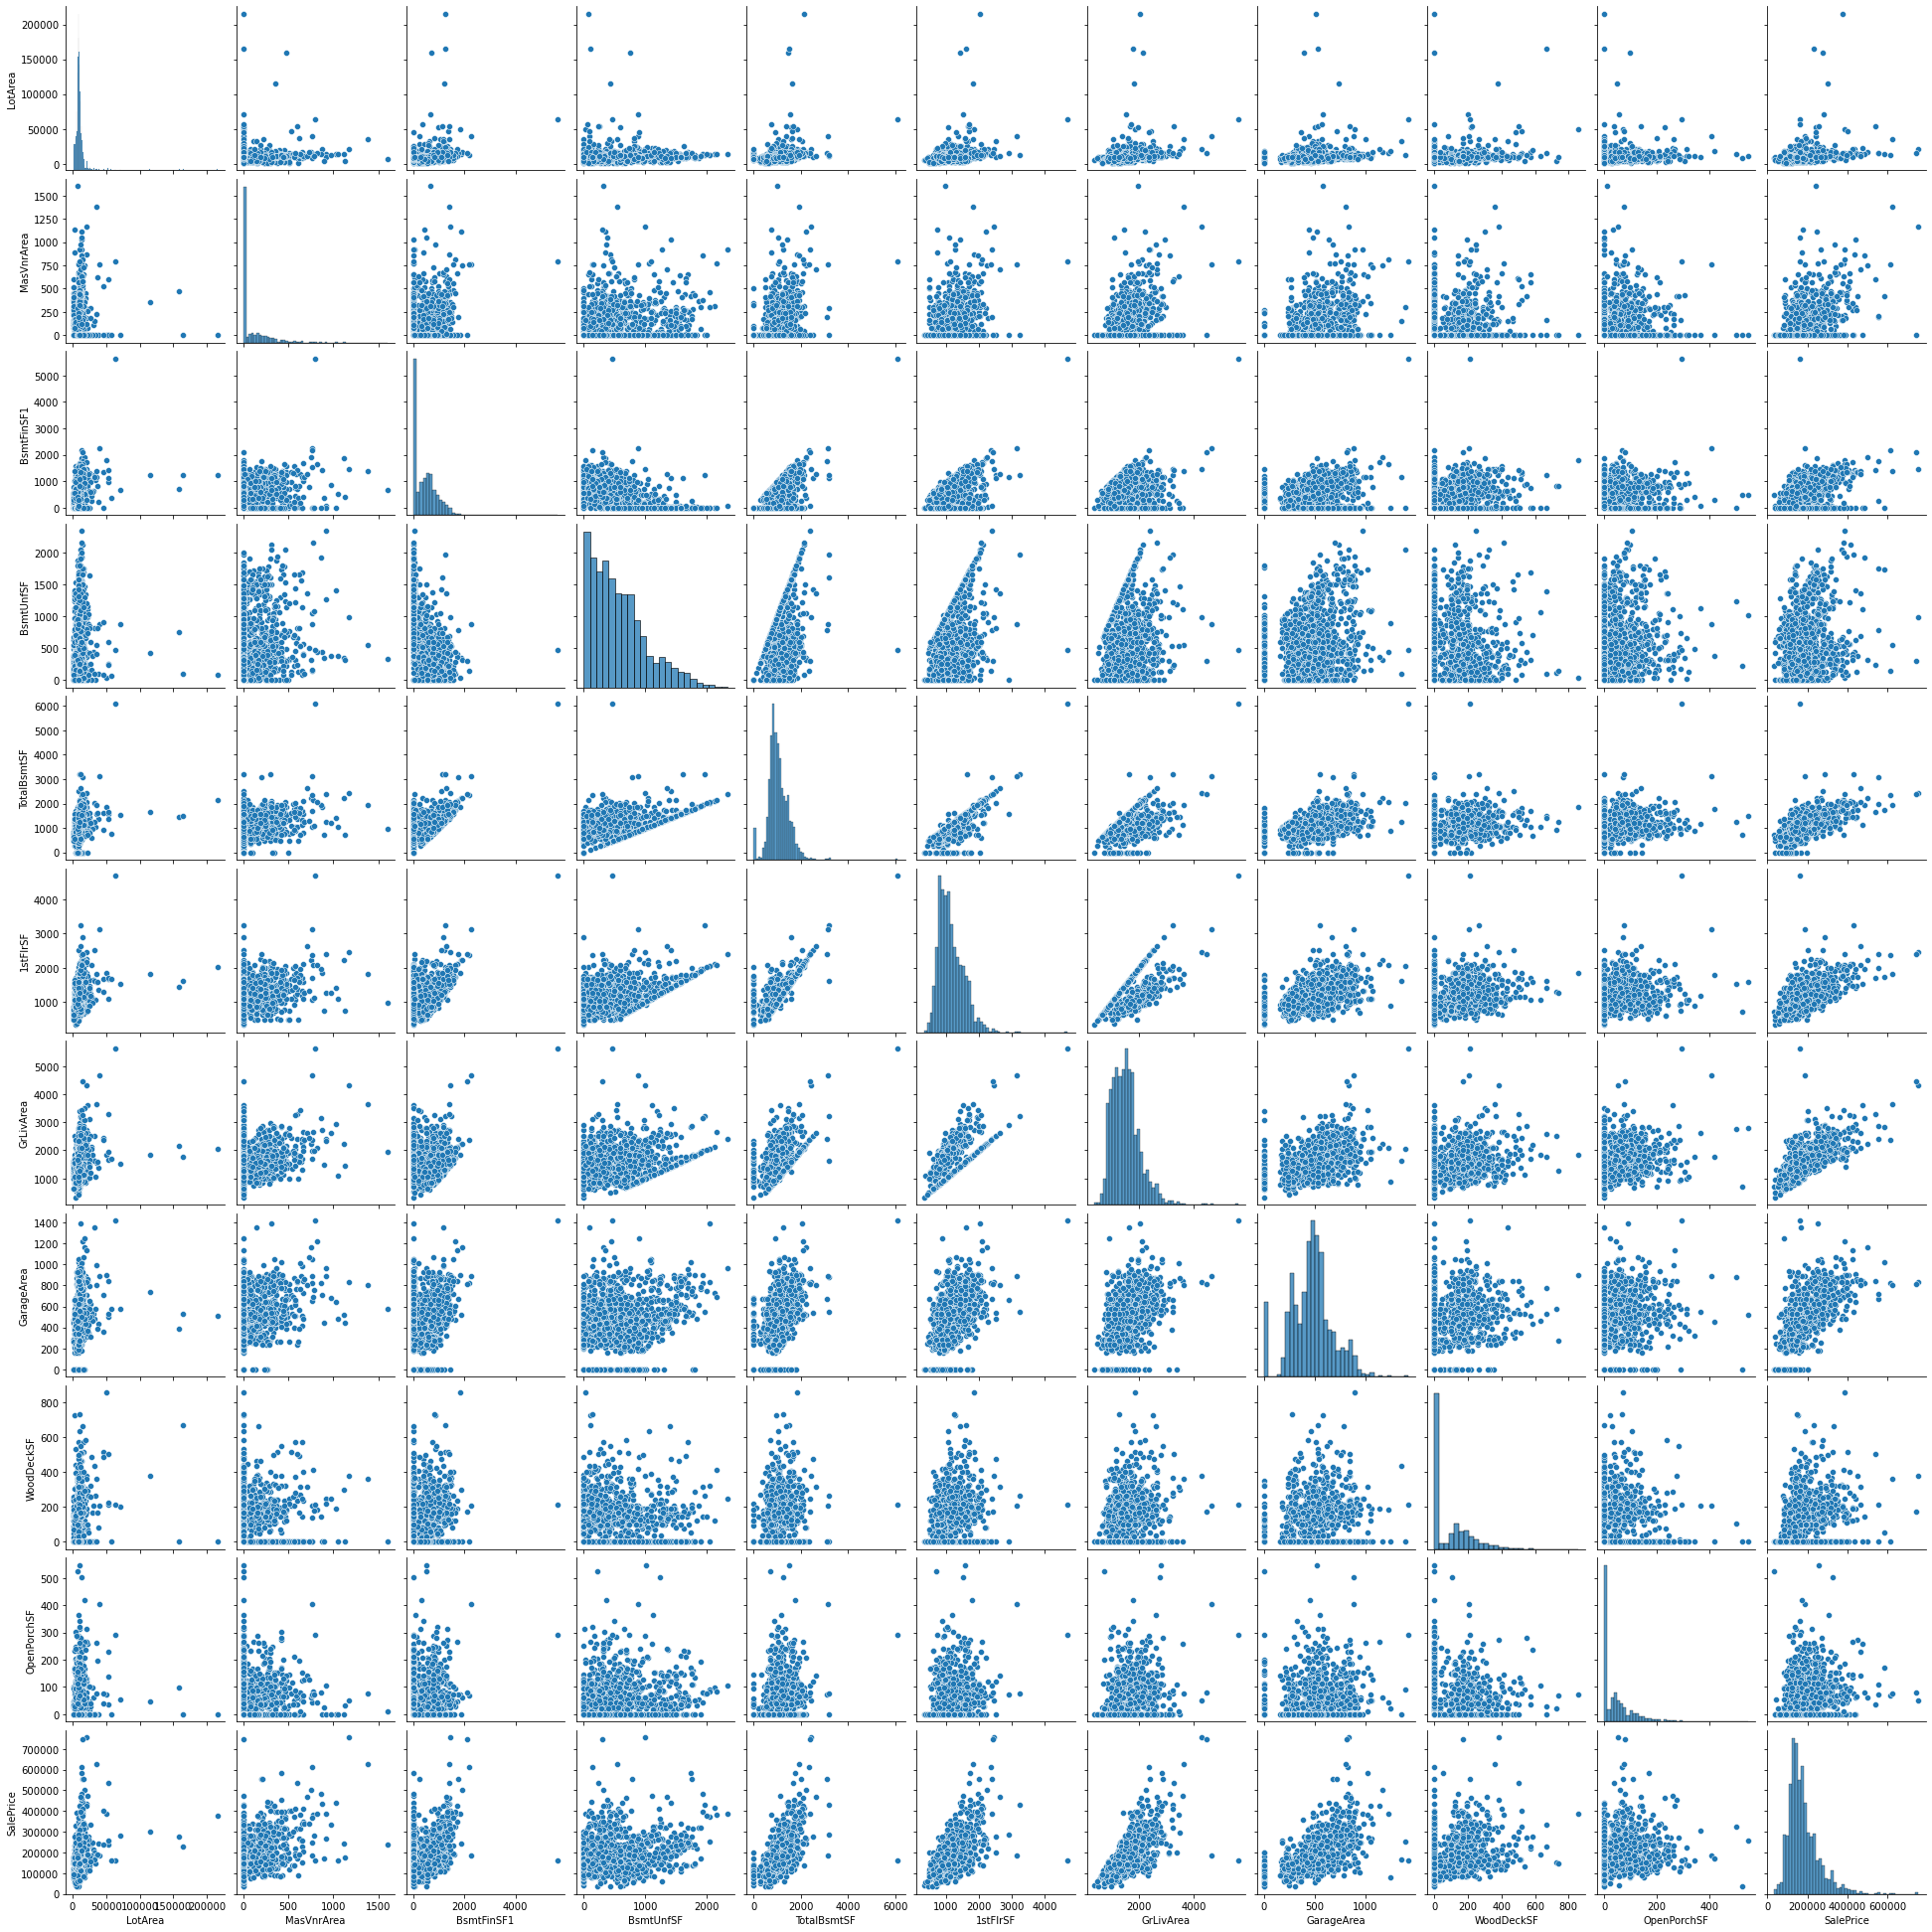

In [10]:
sns.pairplot(data=houses[['LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', 
                          '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                          'SalePrice']])
plt.show()

After observing the pair plot, we see that there are some outliers in almost all the features. 
We also see that there exist alot of missing data as well as `0` data.

`TotalBsmtSF`, `1stFlrSF`, `GrLivArea` show linear relationship with our predictor variable `SalePrice`.

In [ ]:
# dist plot for temperature
sns.distplot(houses['temp'])
plt.show()

### Categorical columns

Let us look at some categorical columns which we think will influence the target variable.

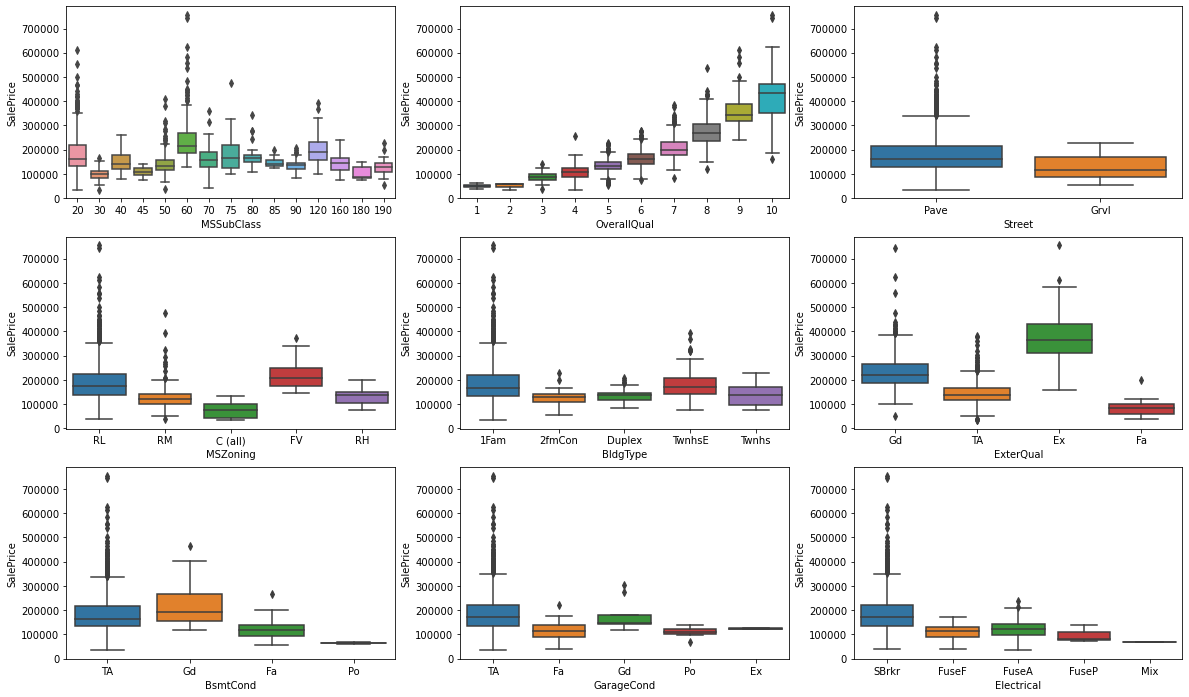

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houses)
plt.subplot(3,3,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = houses)
plt.subplot(3,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = houses)
plt.subplot(3,3,4)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = houses)
plt.subplot(3,3,5)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = houses)
plt.subplot(3,3,6)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = houses)
plt.subplot(3,3,7)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = houses)
plt.subplot(3,3,8)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = houses)
plt.subplot(3,3,9)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = houses)
plt.show()

We observe that the variables that we looked for, have some trend with respect to the target variable. `OverallQual`, `ExterQual`, `BsmtCond` and `MSZoning` seems to be a good predictor of `SalePrice`

## 3. Data Cleaning

In [12]:
# check for percentage of null values
null_count_col = round(houses.isnull().sum() * 100/len(houses.index),2).sort_values(ascending=False)
null_count_col[null_count_col>0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

### Eliminating null values

- We will drop the columns with more than 80% null values
- For values between 10% and 80%, we will impute values using domain knowledge
- We do not require Id column. We'll drop this column as well.

Note - Even if we impute values to these columns, they will have class imbalance. Hence we drop them.

In [13]:
# dropping columns with majority of null values and Id column
houses.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace=True)

### Imputing Null values

#### FirePlaceQu

Referring to data dictionary, we see that NA stands for No Fireplace for `FirePlaceQu` column. We will make necessary changes to the data and eliminate null values.

In [14]:
# We'll replace NA in FireplaceQu column with Absent.
houses['FireplaceQu'].fillna('No Fireplace', inplace=True) 

#### LotFrontage

LotFrontage has 17.74% null values. We assume that there is no linear feet of street connected to property where the values are NA and hence we will impute these values with 0.

In [15]:
# Impute LotFrontage with 0 in place of NA
houses.LotFrontage.fillna(0,inplace = True)

In [16]:
# again check for percentage of null values
round(houses.isnull().sum() * 100/len(houses.index),2).sort_values(ascending=False)[0:20]

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
YearBuilt       0.00
ExterQual       0.00
ExterCond       0.00
Exterior2nd     0.00
Exterior1st     0.00
Foundation      0.00
BsmtFinSF1      0.00
dtype: float64

#### Garage related columns

NA in `GarageType, GarageFinish, GarageQual, GarageCond` columns mean No Garage, so we will replace NA with `No Garage`.

In [17]:
# impute values for garage related columns
houses['GarageType'].fillna('No Garage', inplace=True) 
houses['GarageFinish'].fillna('No Garage', inplace=True) 
houses['GarageQual'].fillna('No Garage', inplace=True) 
houses['GarageCond'].fillna('No Garage', inplace=True)

#### Basement related columns

In [18]:
# Get all categorical Basement columns
bsmt_cols = [feature for feature in houses.select_dtypes(['object']).columns if 'Bsmt' in feature]
bsmt_cols

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [19]:
for feature in bsmt_cols:
    houses[feature].fillna('No Basement', inplace=True)

For the remaining columns, missing values are less than 1%. We will drop these rows.

In [20]:
houses.dropna(inplace = True)

In [21]:
houses.shape

(1370, 76)

In [22]:
# check again columns with max percentage of null values
round(houses.isnull().sum() * 100/len(houses.index),2).sort_values(ascending=False)[0:10]

SalePrice      0.0
Foundation     0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
ExterCond      0.0
BsmtQual       0.0
dtype: float64

Now, we have eliminated all the null data from the dataset, next we'll proceed to check columns with zero values. Let us describe the columns once again.

### Imputing Zeroes

In [23]:
# Getting insights of the features
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1370.0,56.054745,41.073531,20.0,20.00,50.0,70.00,190.0
LotFrontage,1370.0,57.768613,35.031757,0.0,42.00,64.0,79.00,313.0
LotArea,1370.0,10687.435036,10228.507006,1300.0,7731.00,9591.0,11712.75,215245.0
OverallQual,1370.0,6.181752,1.344236,2.0,5.00,6.0,7.00,10.0
OverallCond,1370.0,5.582482,1.081480,2.0,5.00,5.0,6.00,9.0
YearBuilt,1370.0,1972.783942,29.371056,1880.0,1955.00,1975.0,2001.00,2010.0
YearRemodAdd,1370.0,1985.327007,20.452934,1950.0,1967.25,1994.0,2004.00,2010.0
MasVnrArea,1370.0,109.076642,184.589326,0.0,0.00,0.0,171.75,1600.0
BsmtFinSF1,1370.0,454.211679,458.985739,0.0,0.00,399.5,728.00,5644.0
BsmtFinSF2,1370.0,48.418248,164.817484,0.0,0.00,0.0,0.00,1474.0


After describing the data set and taking a look at the columns, we notice that there are few columns with '0' values for 25th, 50th and 75th percentile. We will take a look at these columns.

In [24]:
# check columns for count of zero values
percent_of_zeroes =  np.round((houses[houses.columns] == 0).sum() * 100/len(houses.index),2).sort_values(ascending=False)
# print top 30 features and their percentage of zeroes
percent_of_zeroes[percent_of_zeroes>0]

PoolArea         99.49
LowQualFinSF     98.61
3SsnPorch        98.25
MiscVal          96.42
BsmtHalfBath     94.16
ScreenPorch      91.53
BsmtFinSF2       88.10
EnclosedPorch    86.50
HalfBath         61.24
BsmtFullBath     58.03
MasVnrArea       57.30
2ndFlrSF         56.35
WoodDeckSF       50.73
Fireplaces       44.74
OpenPorchSF      43.65
BsmtFinSF1       30.88
LotFrontage      18.25
BsmtUnfSF         7.52
TotalBsmtSF       2.19
FullBath          0.58
BedroomAbvGr      0.44
dtype: float64

In [25]:
# select columns with more than 80% of 0 values
cols_to_drop = percent_of_zeroes[percent_of_zeroes > 80.0].keys()
cols_to_drop

Index(['PoolArea', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch'],
      dtype='object')

We observe columns `'PoolArea', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch'` have more than 80% of 0 values.

Let us look at the data. There's a possibility that some of these columns might be boolean columns (Yes or No). Let's check for such columns.

In [26]:
# checking number of unique values in each column
unique_count_cols_to_drop = houses[cols_to_drop].nunique().sort_values(ascending=False)
print(unique_count_cols_to_drop.to_string())

BsmtFinSF2       142
EnclosedPorch    110
ScreenPorch       76
MiscVal           20
3SsnPorch         20
LowQualFinSF      17
PoolArea           8
BsmtHalfBath       3


We do not observe any Boolean columns. Although if we had some important columns, we'll still have to drop these classes since they have a large number of `0`s which causes class inbalance. Hence we drop all the columns.

In [27]:
# drop columns with majority zero values
houses.drop(cols_to_drop, inplace=True, axis=1)

Checking columns after dropping columns having large number of `0`s.

In [28]:
# check columns for count of zero values
percent_of_zeroes =  np.round((houses[houses.columns] == 0).sum() * 100/len(houses.index),2).sort_values(ascending=False)
# print top 20 features and their percentage of zeroes
percent_of_zeroes[percent_of_zeroes>0]

HalfBath        61.24
BsmtFullBath    58.03
MasVnrArea      57.30
2ndFlrSF        56.35
WoodDeckSF      50.73
Fireplaces      44.74
OpenPorchSF     43.65
BsmtFinSF1      30.88
LotFrontage     18.25
BsmtUnfSF        7.52
TotalBsmtSF      2.19
FullBath         0.58
BedroomAbvGr     0.44
dtype: float64

We observe columns `'HalfBath', 'BsmtFullBath', 'MasVnrArea', '2ndFlrSF' and 'WoodDeckSF'` have more than 50% of 0 values.

In [29]:
# select columns with more than 50% of 0 values
cols_to_analyse = list(percent_of_zeroes[percent_of_zeroes > 50.0].keys())
cols_to_analyse

['HalfBath', 'BsmtFullBath', 'MasVnrArea', '2ndFlrSF', 'WoodDeckSF']

`HalfBath and BsmtFullBath` have class imbalance and `MasVnrArea, 2ndFlrSF and WoodDeckSF` are numercial columns and have highly skewed values. Hence we drop these columns.

In [30]:
# dropping columns with more than 50% values as 0
houses.drop(cols_to_analyse, inplace=True, axis=1)

### Numerical Column Analysis

Now that we have imputed all the necessary zeroes from the dataset, lets move to segregating columns into categorical and numerical.

We will first take a look at numerical columns.

In [31]:
# check for types of datatypes in the dataset
houses.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [32]:
# get all numerical columns
numerical_cols = houses.select_dtypes(['int64', 'float64']).columns
print (numerical_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [33]:
# let's view all the numerical columns
houses[numerical_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,150,856,856,1710,2,3,1,8,0,2003.0,2,548,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,978,284,1262,1262,1262,2,3,1,6,1,1976.0,2,460,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,486,434,920,920,1786,2,3,1,6,1,2001.0,2,608,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,216,540,756,961,1717,1,3,1,7,1,1998.0,3,642,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,655,490,1145,1145,2198,2,4,1,9,1,2000.0,3,836,84,12,2008,250000


#### Year columns

We observe that there are some `Year` columns in the data. We will take a look at these columns and decide how to handle these values.

In [34]:
# Get all Year columns
year_col = [feature for feature in numerical_cols if 'Yr' in feature or 'Year' in feature]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

- `YearBuilt`    - Year the house was built
- `YearRemodAdd` - Remodel date (same as construction date if no remodeling or additions)
- `GarageYrBlt`  - Year garage was built
- `YrSold`       - Year the house was sold

From the above columns, we will be able to extract the age of the house, years passed after remodelling and age of the garage.

In [35]:
houses[year_col].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1370.000000,1370.000000,1370.000000,1370.000000
mean,1972.783942,1985.327007,1978.353285,2007.811679
std,29.371056,20.452934,24.685798,1.331589
min,1880.000000,1950.000000,1900.000000,2006.000000
25%,1955.000000,1967.250000,1961.000000,2007.000000
50%,1975.000000,1994.000000,1979.500000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [36]:
# derieve age of house from difference between biult year and selling year
houses['HouseAge'] = houses['YrSold'] - houses['YearBuilt']

In [37]:
houses[year_col].corr()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
YearBuilt,1.000000,0.615631,0.824502,-0.007784
YearRemodAdd,0.615631,1.000000,0.640097,0.039436
GarageYrBlt,0.824502,0.640097,1.000000,-0.001708
YrSold,-0.007784,0.039436,-0.001708,1.000000


From the correlation, we can infer that most of garages were built when the houses were built. And majority houses have year as build year. Hence we can say that those houses didn't undergo modification. Hence we will not derive their ages and will drop these columns as well.

In [38]:
# now that we have dereived columns, we will discard the original columns
houses.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)

In [39]:
# update numerical columns list
numerical_cols = houses.select_dtypes(['int64', 'float64']).columns
print (numerical_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'MoSold',
       'SalePrice', 'HouseAge'],
      dtype='object')


In [40]:
houses[numerical_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,MoSold,SalePrice,HouseAge
0,60,65.0,8450,7,5,706,150,856,856,1710,2,3,1,8,0,2,548,61,2,208500,5
1,20,80.0,9600,6,8,978,284,1262,1262,1262,2,3,1,6,1,2,460,0,5,181500,31
2,60,68.0,11250,7,5,486,434,920,920,1786,2,3,1,6,1,2,608,42,9,223500,7
3,70,60.0,9550,7,5,216,540,756,961,1717,1,3,1,7,1,3,642,35,2,140000,91
4,60,84.0,14260,8,5,655,490,1145,1145,2198,2,4,1,9,1,3,836,84,12,250000,8


- MSSubClass is encoded with number codes and hence we will convert it into a category
- MoSold is the month when the house was sold. We will check this variable.

#### MSSubclass
Looking at the data dictionary, we see that values are just an encoding and their difference does not have any significance. Hence we will convert it to catgorical column.

In [41]:
# convert column to categorical
houses['MSSubClass'] = houses['MSSubClass'].astype('object')

#### MoSold

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

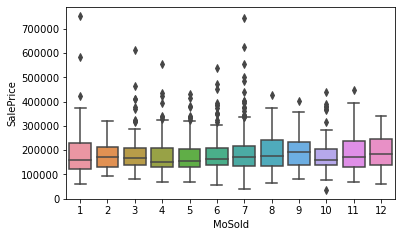

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = houses)

As we can observe, MoSold doesn't have any significant influence on the SalePrice and hence we will discard this column.

In [43]:
# dropping MoSold since it doesn't influence the target variable significantly
houses.drop(['MoSold'], axis = 1, inplace=True)

#### Basement columns

After observing the basement columns, we notice that `TotalBsmtSF` is addition of `BsmtFinSF1` and `BsmtUnfSF`. We will plot a scatterplot to visualize these columns.	

In [44]:
df = houses['BsmtFinSF1'] + houses['BsmtUnfSF'] == houses['TotalBsmtSF']
df.value_counts()

True     1207
False     163
dtype: int64

We see almost 88% values of `TotalBsmtSF` column are sum of `BsmtFinSF1` and `BsmtUnfSF`.
Thus, we will drop the two columns and keep the `TotalBsmtSF` column.

In [45]:
# dropping BsmtFinSF1 and BsmtUnfSF since its distribution is explained by TotalBsmtSF.
houses.drop(['BsmtFinSF1', 'BsmtUnfSF'], axis = 1, inplace=True)

Let's update the numerical column list now that we have converted columns into categorical.

In [46]:
# get all numerical columns
numerical_cols = houses.select_dtypes(['int64', 'float64']).columns
print (numerical_cols)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF',
       'SalePrice', 'HouseAge'],
      dtype='object')


In [47]:
houses[numerical_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
LotFrontage,1370.0,57.768613,35.031757,0.0,42.0,64.0,79.00,92.0,104.00,134.93,313.0
LotArea,1370.0,10687.435036,10228.507006,1300.0,7731.0,9591.0,11712.75,14573.3,17501.65,39410.90,215245.0
OverallQual,1370.0,6.181752,1.344236,2.0,5.0,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1370.0,5.582482,1.081480,2.0,5.0,5.0,6.00,7.0,8.00,9.00,9.0
TotalBsmtSF,1370.0,1073.372263,435.558797,0.0,808.5,1008.0,1314.00,1614.2,1753.00,2175.98,6110.0
1stFlrSF,1370.0,1176.086131,385.381717,438.0,894.0,1098.0,1414.00,1686.1,1837.10,2218.86,4692.0
GrLivArea,1370.0,1533.450365,519.489200,438.0,1152.0,1479.0,1788.00,2169.3,2470.75,3120.68,5642.0
FullBath,1370.0,1.577372,0.547455,0.0,1.0,2.0,2.00,2.0,2.00,3.00,3.0
BedroomAbvGr,1370.0,2.865693,0.782985,0.0,2.0,3.0,3.00,4.0,4.00,5.00,6.0
KitchenAbvGr,1370.0,1.037956,0.194944,1.0,1.0,1.0,1.00,1.0,1.00,2.00,3.0


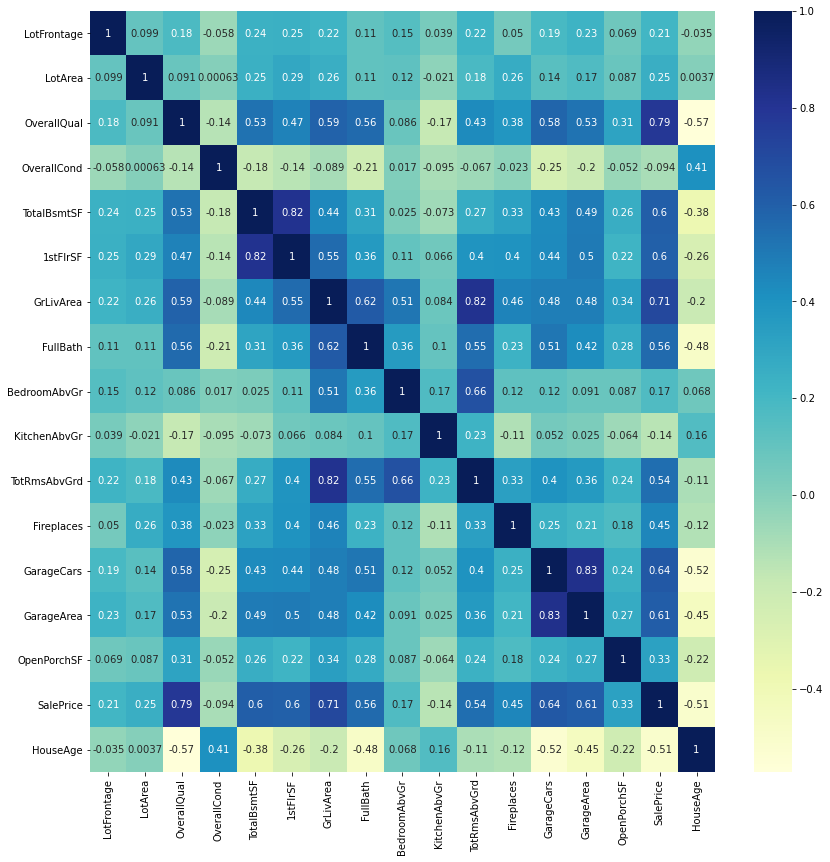

In [48]:
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(houses[numerical_cols].corr(), 
            xticklabels=houses[numerical_cols].corr().columns.values,
            yticklabels=houses[numerical_cols].corr().columns.values,annot= True, cmap="YlGnBu")

plt.show()

- `TotalBsmtSF` is Total square feet of basement area and `1stFlrSF` is the area of First Floor in square feet. We assume these values have high correlation as the first floor is built over the same aread of basement floor. Hence, we will drop the `1stFlrSF` column
- `GrLivArea` and `TotRmsAbvGrd` are highly correlated as well. This is because larger the ground living area, more rooms can be accomodated. But a house can have more number of smaller rooms; thus increasing it's value. Hence we will drop `TotRmsAbvGrd` column.
- Similarly, larger the Garage area, more cars it will accomodate. Hence we will drop `GarageArea`.

In [49]:
houses.drop(['1stFlrSF', 'GrLivArea', 'GarageArea'], axis=1, inplace=True)

### Categorical column analysis

We will now take a look at the categorical columns.

In [50]:
# get all categorical columns
categorical_cols = houses.select_dtypes(['object']).columns
print (categorical_cols)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [51]:
houses[categorical_cols].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


We observe there are columns having ratings such as 'Ex' for Excellent, 'Gd' for Good and so on. We will convert these to numerical values according to domain knowlegde. 
We will encode them as following:
- Ex	Excellent       -> 5
- Gd	Good            -> 4
- TA	Typical/Average -> 3
- Fa	Fair            -> 2
- Po	Poor            -> 1
- NA	No Garage       -> 0

In [52]:
rating_feature_list = ['ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']

In [53]:
houses[rating_feature_list].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual
0,Gd,TA,Gd,TA,Ex,Gd
1,TA,TA,Gd,TA,Ex,TA
2,Gd,TA,Gd,TA,Ex,Gd
3,TA,TA,TA,Gd,Gd,Gd
4,Gd,TA,Gd,TA,Ex,Gd


In [54]:
for feature in rating_feature_list:
    print(houses[feature].unique())
    print('__________________________________')

['Gd' 'TA' 'Ex' 'Fa']
__________________________________
['TA' 'Gd' 'Fa' 'Ex']
__________________________________
['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
__________________________________
['TA' 'Gd' 'No Basement' 'Fa' 'Po']
__________________________________
['Ex' 'Gd' 'TA' 'Fa' 'Po']
__________________________________
['Gd' 'TA' 'Ex' 'Fa']
__________________________________


In [55]:
# creating dictionary for mapping the ordinal numerical value.
rating_dict = {'Ex' : 5, 'Gd' : 4, 'TA': 3, 'Fa' : 2, 'Po' : 1, 'No Basement' : 0}

def rating_mapping(data, feature):
    data[feature] = data[feature].map(rating_dict)
    
for feature in rating_feature_list:
    rating_mapping(houses, feature)

In [56]:
houses[rating_feature_list].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual
0,4,3,4,3,5,4
1,3,3,4,3,5,3
2,4,3,4,3,5,4
3,3,3,3,4,4,4
4,4,3,4,3,5,4


In [57]:
# checking number of unique values in each column
cat_col_value_count = houses[categorical_cols].nunique().sort_values(ascending=False)
print(cat_col_value_count.to_string())

Neighborhood     25
Exterior2nd      16
MSSubClass       15
Exterior1st      14
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
BsmtFinType2      7
Functional        7
BsmtFinType1      7
RoofStyle         6
Foundation        6
SaleCondition     6
Heating           6
FireplaceQu       6
GarageType        6
GarageCond        5
BsmtCond          5
BsmtQual          5
HeatingQC         5
MSZoning          5
Electrical        5
LotConfig         5
BsmtExposure      5
BldgType          5
GarageQual        5
LotShape          4
LandContour       4
ExterCond         4
KitchenQual       4
MasVnrType        4
ExterQual         4
PavedDrive        3
LandSlope         3
GarageFinish      3
Utilities         2
Street            2
CentralAir        2


Let's look at the pie plots to understand the distribution of values for following categorical variables. 

In [58]:
houses_cat = houses[categorical_cols].copy()

In [59]:
houses_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,No,GLQ,Unf,GasA,5,Y,SBrkr,4,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,3,3,CBlock,4,3,Gd,ALQ,Unf,GasA,5,Y,SBrkr,3,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,Mn,GLQ,Unf,GasA,5,Y,SBrkr,4,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,4,No,ALQ,Unf,GasA,4,Y,SBrkr,4,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,Av,GLQ,Unf,GasA,5,Y,SBrkr,4,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


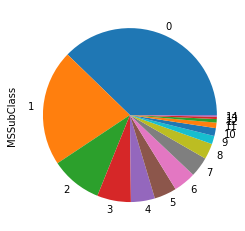

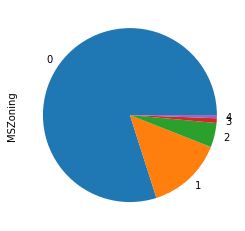

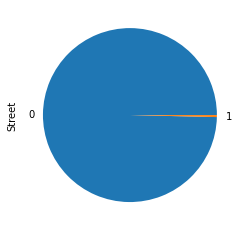

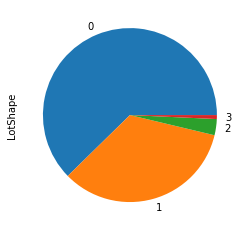

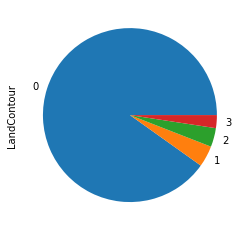

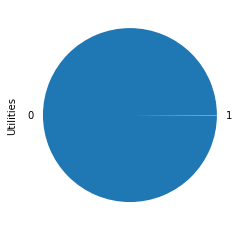

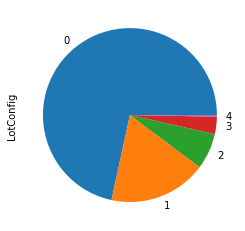

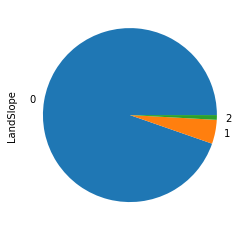

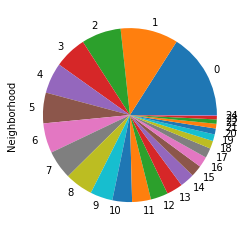

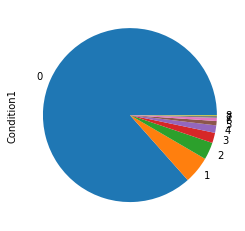

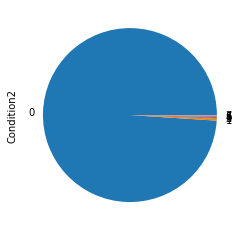

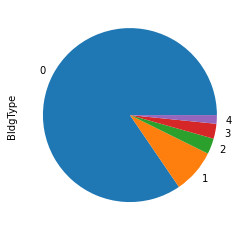

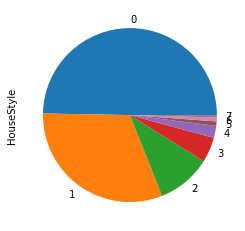

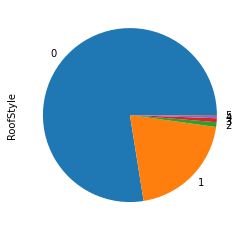

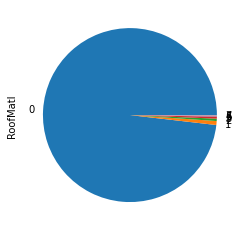

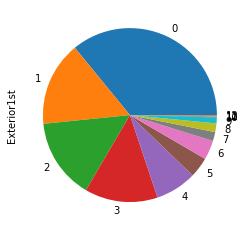

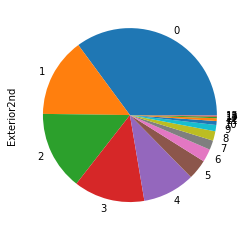

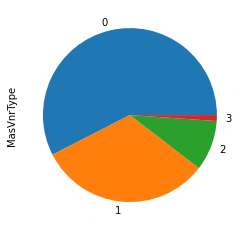

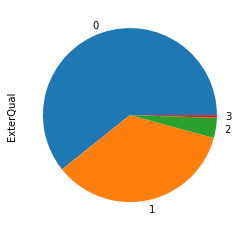

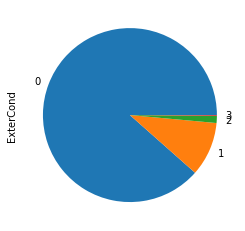

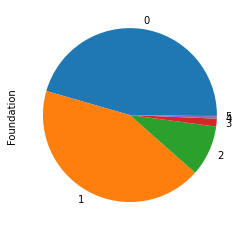

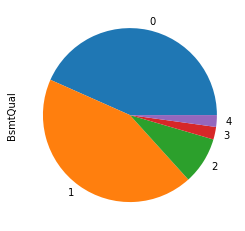

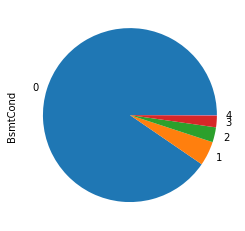

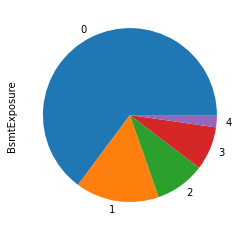

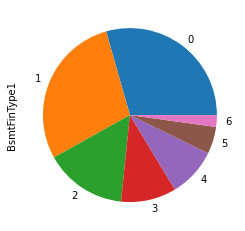

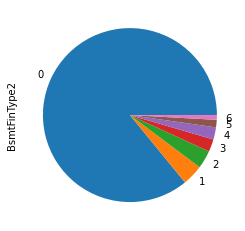

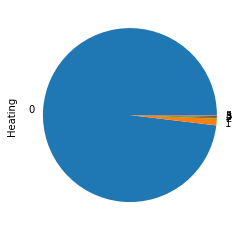

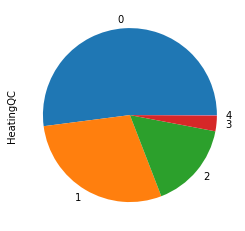

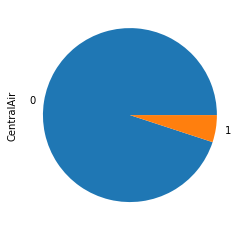

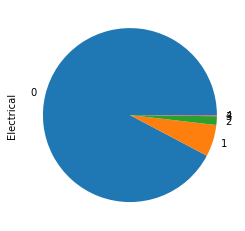

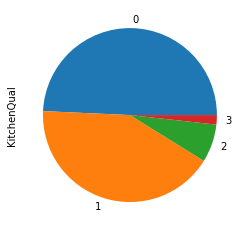

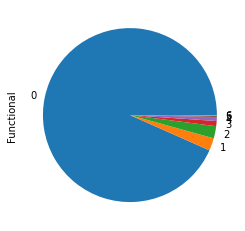

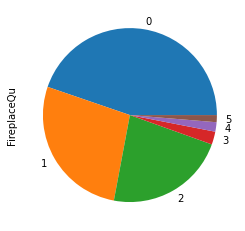

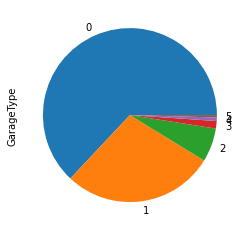

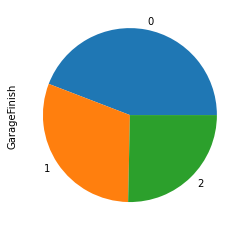

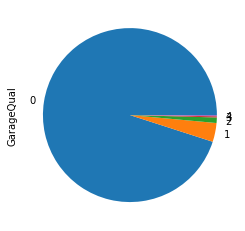

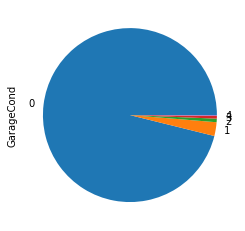

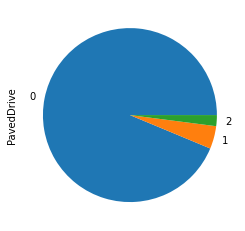

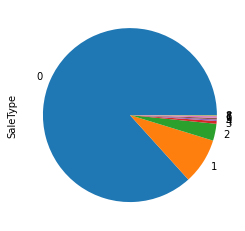

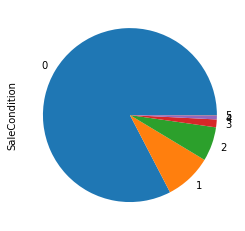

In [60]:
for feature in categorical_cols:
    houses_cat[feature].value_counts().plot.pie(labels=houses_cat.index)
    plt.show()

From the above described graphs, we notice that few features have insufficient variety of data. Thus these features won't be of any use to us. We will drop these features

In [61]:
features_to_drop = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LandSlope', 'LandContour',
                    'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond',
                    'PavedDrive']

In [62]:
houses.drop(features_to_drop, axis=1, inplace=True)

#### Neighborhood

We observe that `Neighborhood` has 25 various category values. We'll try to reduce these to a lower number.

In [63]:
neighborhoods = houses.Neighborhood.value_counts()
neighborhoods

NAmes      219
CollgCr    147
OldTown    101
Somerst     83
Gilbert     78
Edwards     78
NridgHt     76
NWAmes      73
Sawyer      71
SawyerW     57
Crawfor     50
BrkSide     48
Mitchel     44
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

We'll keep the top neighborhoods which are present in more than 70 records and put the rest into another category of `Others`.

In [64]:
top_nghbhds = list(neighborhoods[neighborhoods>70].keys())
top_nghbhds

['NAmes',
 'CollgCr',
 'OldTown',
 'Somerst',
 'Gilbert',
 'Edwards',
 'NridgHt',
 'NWAmes',
 'Sawyer']

In [65]:
# updating Neighborhood to 'Others'
houses.Neighborhood = houses.Neighborhood.astype('object').where(houses.Neighborhood.isin(top_nghbhds), 'Others')
houses.Neighborhood = houses.Neighborhood.astype('category')

In [66]:
houses.Neighborhood.value_counts()

Others     444
NAmes      219
CollgCr    147
OldTown    101
Somerst     83
Gilbert     78
Edwards     78
NridgHt     76
NWAmes      73
Sawyer      71
Name: Neighborhood, dtype: int64

#### Exterior1st

In [67]:
Exteriors = houses.Exterior1st.value_counts()
Exteriors

VinylSd    492
HdBoard    215
MetalSd    205
Wd Sdng    186
Plywood    105
CemntBd     52
BrkFace     49
Stucco      23
WdShing     22
AsbShng     15
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

We'll keep the top exteriors which are present in more than 100 records and put the rest into another category of `Others`.

In [68]:
top_exteriors = list(Exteriors[Exteriors>100].keys())
top_exteriors

['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']

In [69]:
# updating Neighborhood to 'Others'
houses.Exterior1st = houses.Exterior1st.astype('object').where(houses.Exterior1st.isin(top_exteriors), 'Others')
houses.Exterior1st = houses.Exterior1st.astype('category')

In [70]:
houses.Exterior1st.value_counts()

VinylSd    492
HdBoard    215
MetalSd    205
Wd Sdng    186
Others     167
Plywood    105
Name: Exterior1st, dtype: int64

#### Exterior2nd

In [71]:
Exteriors_2 = houses.Exterior2nd.value_counts()
Exteriors_2

VinylSd    481
HdBoard    201
MetalSd    201
Wd Sdng    181
Plywood    133
CmentBd     51
Wd Shng     33
Stucco      24
BrkFace     24
AsbShng     16
ImStucc     10
Brk Cmn      7
Stone        4
AsphShn      2
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

We'll keep the top exteriors which are present in more than 100 records and put the rest into another category of `Others`.

In [72]:
top_exteriors_2 = list(Exteriors_2[Exteriors_2>100].keys())
top_exteriors_2

['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood']

In [73]:
# updating Neighborhood to 'Others'
houses.Exterior2nd = houses.Exterior2nd.astype('object').where(houses.Exterior2nd.isin(top_exteriors_2), 'Others')
houses.Exterior2nd = houses.Exterior2nd.astype('category')

In [74]:
houses.Exterior2nd.value_counts()

VinylSd    481
MetalSd    201
HdBoard    201
Wd Sdng    181
Others     173
Plywood    133
Name: Exterior2nd, dtype: int64

We notice Exterior1st and Exterior2nd have similar trends. Let's look at the bar plots for the same.

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

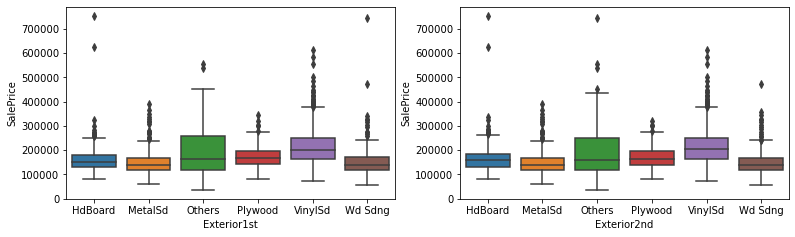

In [75]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = houses)
plt.subplot(3,3,2)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = houses)

Our assumption was correct and the similar trend between `Exterior1st` and `Exterior2nd` is clearly visible.Hence we can drop any one of the two columns.

We will proceed to drop `Exterior1st` column.

In [76]:
houses.drop('Exterior1st', axis=1, inplace=True)

In [77]:
# update all categorical columns
categorical_cols = houses.select_dtypes(['object', 'category']).columns
print (categorical_cols)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


Let's look at the data head once again.

In [78]:
houses[categorical_cols].head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,PConc,No,GLQ,Unf,No Fireplace,Attchd,RFn,WD,Normal
1,20,RL,Reg,FR2,Others,Feedr,1Fam,1Story,Gable,MetalSd,None,CBlock,Gd,ALQ,Unf,TA,Attchd,RFn,WD,Normal
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,TA,Attchd,RFn,WD,Normal
3,70,RL,IR1,Corner,Others,Norm,1Fam,2Story,Gable,Others,None,BrkTil,No,ALQ,Unf,Gd,Detchd,Unf,WD,Abnorml
4,60,RL,IR1,FR2,Others,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,PConc,Av,GLQ,Unf,TA,Attchd,RFn,WD,Normal


## 4. Data Preparation

In [79]:
## One hot encoding the categorical columns
categorical_encoded = pd.get_dummies(houses[categorical_cols], drop_first=True)
categorical_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [80]:
# Add the results to the original housing dataframe
houses = pd.concat([houses, categorical_encoded], axis = 1)

In [81]:
# Now let's see the head of our dataframe.
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,OpenPorchSF,SaleType,SaleCondition,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,BrkFace,4,3,PConc,4,3,No,GLQ,Unf,856,5,2,3,1,4,8,0,No Fireplace,Attchd,RFn,2,61,WD,Normal,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Others,Feedr,1Fam,1Story,6,8,Gable,MetalSd,None,3,3,CBlock,4,3,Gd,ALQ,Unf,1262,5,2,3,1,3,6,1,TA,Attchd,RFn,2,0,WD,Normal,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,BrkFace,4,3,PConc,4,3,Mn,GLQ,Unf,920,5,2,3,1,4,6,1,TA,Attchd,RFn,2,42,WD,Normal,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Others,Norm,1Fam,2Story,7,5,Gable,Others,None,3,3,BrkTil,3,4,No,ALQ,Unf,756,4,1,3,1,4,7,1,Gd,Detchd,Unf,3,35,WD,Abnorml,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,Others,Norm,1Fam,2Story,8,5,Gable,VinylSd,BrkFace,4,3,PConc,4,3,Av,GLQ,Unf,1145,5,2,4,1,4,9,1,TA,A

In [82]:
# Drop all categorical columns for which we have created the dummies
houses.drop(categorical_cols, axis = 1, inplace = True)

houses.head()

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,4,3,4,3,856,5,2,3,1,4,8,0,2,61,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,3,3,4,3,1262,5,2,3,1,3,6,1,2,0,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,4,3,4,3,920,5,2,3,1,4,6,1,2,42,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,3,3,3,4,756,4,1,3,1,4,7,1,3,35,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,4,3,4,3,1145,5,2,4,1,4,9,1,3,84,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [83]:
houses.shape

(1370, 132)

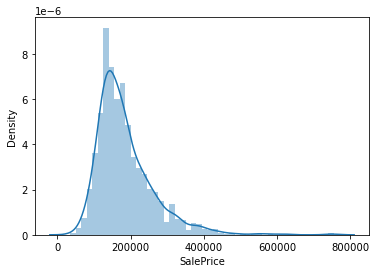

In [84]:
sns.distplot(houses['SalePrice'])
plt.show()

We observe that the target variable `SalePrice` is Right skewed. 

In [85]:
houses['SalePrice'] = np.log(houses['SalePrice'])

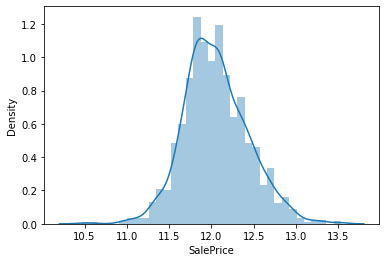

In [86]:
sns.distplot(houses['SalePrice'])
plt.show()

We observe that the target variable is normally distributed after applying log transformation.

In [87]:
houses.head()

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,4,3,4,3,856,5,2,3,1,4,8,0,2,61,12.247694,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,3,3,4,3,1262,5,2,3,1,3,6,1,2,0,12.109011,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,4,3,4,3,920,5,2,3,1,4,6,1,2,42,12.317167,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,3,3,3,4,756,4,1,3,1,4,7,1,3,35,11.849398,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,4,3,4,3,1145,5,2,4,1,4,9,1,3,84,12.429216,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## 5. Splitting the Data into Training and Testing Sets

In [88]:
X = houses[houses.columns]
X.pop('SalePrice')
y = houses['SalePrice']

### Rescaling the Features 

We will use Standard Scaling.

In [89]:
from sklearn.preprocessing import RobustScaler

In [90]:
X_scaled = pd.DataFrame(RobustScaler().fit_transform(X))
X_scaled.columns = X.columns

In [91]:
X_scaled

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.027027,-0.286557,0.5,0.0,1.0,0.0,0.0,0.0,-0.300692,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.492754,-0.608696,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.432432,0.002260,0.0,3.0,0.0,0.0,0.0,0.0,0.502473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.391304,-0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.108108,0.416651,0.5,0.0,1.0,0.0,0.0,0.0,-0.174085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.217391,-0.565217,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.108108,-0.010297,0.5,0.0,0.0,0.0,-1.0,1.0,-0.498516,-0.5,-1.0,0.0,0.0,1.0,0.5,0.0,1.0,0.115942,1.260870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [92]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## 5. Model building and evaluation

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression to get a baseline performance.

In [93]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

In [94]:
# Instantiate
linear_regression = LinearRegression()

# Fit a line
linear_regression.fit(X_train, y_train)

LinearRegression()

In [95]:
# Print the coefficients and intercept
print(linear_regression.intercept_)
print(linear_regression.coef_)

9.968731695122468
[-1.75736255e-04  2.14940077e-06  6.16664396e-02  3.43829181e-02
  1.07099168e-02 -1.61239494e-02  2.11300526e-02  4.04538281e-02
  8.69065622e-05  1.41625252e-02  5.09024145e-02 -1.90885858e-03
 -9.73025021e-02  4.73777317e-02  3.51045723e-02  1.36431775e-02
  7.38897482e-02  1.52474718e-04 -6.71293075e-04 -1.16293839e-01
  1.62868178e-01 -6.97910447e-02  5.45593549e-02 -2.36256912e-02
 -8.08593856e-03  1.11201365e-01  2.91233050e-02 -4.82757913e-02
 -8.61628160e-03 -4.40134278e-02 -1.04505672e-01  5.44023990e-03
  1.36528004e-02  5.55881445e-01  4.96106486e-01  5.01628446e-01
  4.42799527e-01  1.27138824e-02 -1.44326392e-01 -1.74061662e-02
  3.76613388e-02 -4.42203270e-02 -4.19864771e-02 -9.78126917e-04
 -7.32348624e-02 -3.83919638e-02 -1.69440207e-02 -2.73756359e-02
  9.37537326e-02 -2.02656184e-03  4.58415618e-02  2.41765304e-03
  1.00839712e-02 -5.09568126e-04  5.67893550e-02  4.88700788e-02
  7.30188171e-02 -1.57439848e-02  3.62354304e-02 -6.44041056e-02
  1.487

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
def adj_r_squared(model, X, y):
        return str(np.round(1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1), 3))
    
def print_model_metrics(X_train, X_test, y_train, y_test, model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metric = []
    print('####Train scores####')
    print('----------------------------')
    r2_train = np.round(r2_score(y_train, y_pred_train),3)
    print('R2_train: '+str(r2_train))
    metric.append(r2_train)

    print('Train Adj R-squared: '+ adj_r_squared(model, X_train, y_train))
    metric.append(adj_r_squared(model, X_train, y_train))
    rss_train = np.round(np.sum(np.square(y_train - y_pred_train)),3)
    print('Train RSS: '+str(rss_train))
    metric.append(rss_train)

    mse_train = np.round(mean_squared_error(y_train, y_pred_train),3)
    print('Train MSE: '+str(mse_train))
    metric.append(mse_train**0.5)
    
    print('\n####Test scores####')
    print('----------------------------')

    r2_test = np.round(r2_score(y_test, y_pred_test),3)
    print('R2_test: '+str(r2_test))
    metric.append(r2_test)

    print('Test Adj R-squared: '+ adj_r_squared(model, X_test, y_test))
    metric.append(adj_r_squared(model, X_test, y_test))

    rss_test = np.round(np.sum(np.square(y_test - y_pred_test)),3)
    print('Test RSS: '+str(rss_test))
    metric.append(rss_test)

    mse_test = np.round(mean_squared_error(y_test, y_pred_test),3)
    print('Test MSE: '+str(mse_test))
    metric.append(mse_test**0.5)
    
    return metric


In [98]:
lr_metric = print_model_metrics(X_train, X_test, y_train, y_test, linear_regression)

####Train scores####
----------------------------
R2_train: 0.903
Train Adj R-squared: 0.888
Train RSS: 12.852
Train MSE: 0.013

####Test scores####
----------------------------
R2_test: 0.848
Test Adj R-squared: 0.776
Test RSS: 9.96
Test MSE: 0.024


## Lasso Regression

In [99]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [101]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [102]:
lasso.coef_

array([-1.22639818e-04,  2.38159125e-06,  7.19278315e-02,  3.80541235e-02,
        2.27357781e-02, -1.51146622e-03,  2.04662636e-02,  1.07619267e-02,
        7.20052699e-05,  1.66351590e-02,  3.99078488e-02,  5.17713724e-03,
       -7.19587628e-02,  4.31280466e-02,  4.24898929e-02,  2.21487201e-02,
        6.80418550e-02,  1.80581279e-04, -1.12278795e-03, -7.27356615e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.71793629e-02, -0.00000000e+00,
       -0.00000000e+00,  4.26763766e-02, -0.00000000e+00,  2.18012402e-02,
       -3.41960860e-02,  0.00000000e+00, -3.97769528e-02, -1.29701084e-02,
        3.55193741e-02, -1.36307225e-02, -0.00000000e+00, -0.00000000e+00,
       -3.98272087e-02, -1.06894941e-02, -0.00000000e+00, -0.00000000e+00,
        5.27160993e-02,  0.00000000e+00,  2.68622783e-02, -0.00000000e+00,
        4.06898341e-03, -

### Observations

In [103]:
print('Lasso Regression (alpha = 0.001)')
lasso_metric = print_model_metrics(X_train, X_test, y_train, y_test, lasso)

Lasso Regression (alpha = 0.001)
####Train scores####
----------------------------
R2_train: 0.886
Train Adj R-squared: 0.868
Train RSS: 15.146
Train MSE: 0.016

####Test scores####
----------------------------
R2_test: 0.844
Test Adj R-squared: 0.771
Test RSS: 10.172
Test MSE: 0.025


The difference in Test R2 and Test Adj R2 (7%) explains the model contains irrelevant variables.

### Top 5 features for Lasso Regression

In [104]:
betas = pd.DataFrame(index=[X_train.columns], 
                     columns = ['Lasso'])
betas['Lasso'] = lasso.coef_ # Lasso Regression

# Display top 5 features selected by Lasso
betas.sort_values(by='Lasso', ascending=False)[0:5]

,Lasso
OverallQual,0.071928
GarageCars,0.068042
SaleType_New,0.064629
Neighborhood_NridgHt,0.052716
SaleCondition_Normal,0.044369


Let's analyze the top 5 features of the model.
- `OverallQual` This feature makes sence since, higher the overall quality, more expensive will be the house.
- `GarageCars` More cars will fit into a garage that is big enough. Generally, bigger houses have bigger garages.
- `SaleType_New` Used items are often less expensive than new items. This logic applies here as well. A new house will have a higher sale price than a used one.
- `Neighborhood_NridgHt` Northridge Heights has 16 important cities in or around it. Which justifies the houses being expensive.
- `SaleCondition_Normal` Normal sale conditions usually have higher sale prices than partially complete houses and trading of houses between family members

Text(0, 0.5, 'y_pred')

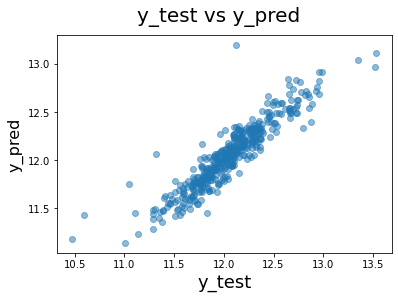

In [105]:
# Plotting y_test and y_pred to understand the spread
y_pred_test = lasso.predict(X_test)
fig = plt.figure()
plt.scatter(y_test, y_pred_test, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## RFE
Before we perform Ridge regression, we will compute Recursive feature elimination to get top n best features.

In [106]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [107]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'FullBath', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_85', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_NridgHt', 'Neighborhood_Others', 'Neighborhood_Somerst',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRNe', 'BldgType_Twnhs', 'HouseStyle_2.5Unf',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType1_Unf', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_Unf',
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_New',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
    

In [109]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [110]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

## Ridge Regression

In [111]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12, 15, 18, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12, 15,
                                   18, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [113]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.0793475   0.03646513  0.04030876  0.05931101 -0.09987542  0.06048648
  0.04453987  0.05951899  0.08606862 -0.08829437  0.05643693 -0.08571257
  0.0318537  -0.05888675 -0.0980446   0.08921844  0.02937799  0.0742804
 -0.01089744  0.07219945 -0.02899887  0.08919087  0.04664388  0.0564392
  0.0563141   0.03188159  0.040909   -0.02669588 -0.08407062 -0.04184263
  0.03551005  0.0606202   0.03676138  0.02533704  0.07376356 -0.02387502
 -0.02387502 -0.09087058  0.05403451  0.07019939  0.0398179  -0.03472745
  0.02876949 -0.05072512  0.07416721  0.01041848 -0.00060364  0.02453777
  0.06924508  0.02765235]


In [114]:
print('Ridge Regression (alpha = 5)')
ridge_metric = print_model_metrics(X_train_rfe, X_test_rfe, y_train, y_test, ridge)

Ridge Regression (alpha = 5)
####Train scores####
----------------------------
R2_train: 0.879
Train Adj R-squared: 0.873
Train RSS: 15.988
Train MSE: 0.017

####Test scores####
----------------------------
R2_test: 0.838
Test Adj R-squared: 0.816
Test RSS: 10.565
Test MSE: 0.026


### Observations

By keeping RFE count initially at 30, we had following observations:
- Train R-squared: 0.82
- Test R-squared: 0.782
- Train Adj R-squared: 0.814
- Test Adj R-squared: 0.765
- Train RSS: 23.858
- Test RSS: 14.241
- Train MSE: 0.025
- Test MSE: 0.035
        
Then we tried increasing the RFE count to 80 and got following observations:
- Train R-squared: 0.885
- Test R-squared: 0.84
- Train Adj R-squared: 0.874
- Test Adj R-squared: 0.802
- Train RSS: 15.267
- Test RSS: 10.432
- Train MSE: 0.016
- Test MSE: 0.025

We found there was significent increase in accuracy, however, the difference between test r-squared and adjusted r-squared increased. This means multicollinearity was introduced in the model. Thus we reduced the count to 50 and check the results.

By tuning RFE count to 50, we had following observations: 
- Train R-squared: 0.879
- Test R-squared: 0.838
- Train Adj R-squared: 0.873
- Test Adj R-squared: 0.816
- Train RSS: 15.988
- Test RSS: 10.565
- Train MSE: 0.017
- Test MSE: 0.026

We observed increase in accuracy and slight decrease in difference between r-squared and adjusted r-squared with respect to RFE  = 30. Also there isn't a huge difference between test r-squared and adjusted r-squared.

Hence we conclude that the model is best when we keep RFE count to 50.


### Top 5 features forRidge Regression

In [115]:
betas = pd.DataFrame(index=[X_train_rfe.columns], 
                     columns = ['Ridge'])
betas['Ridge'] = ridge.coef_ # Lasso Regression

# Display top 10 features selected by Lasso
betas.sort_values(by='Ridge', ascending=False)[0:5]

,Ridge
MSZoning_FV,0.089218
Neighborhood_NridgHt,0.089191
GarageCars,0.086069
OverallQual,0.079347
MSZoning_RL,0.074280


- `MSZoning_FV` Floating Village Residential areas attract higher sale price because of their rarity and need for water body around it.
- `Neighborhood_NridgHt` Northridge Heights has 16 important cities in or around it. Which justifies the houses being expensive.
- `GarageCars` More cars will fit into a garage that is big enough. Generally, bigger houses have bigger garages.
- `OverallQual` This feature makes sence since, higher the overall quality, more expensive will be the house.
- `MSZoning_RL` Residential low density, as the name suggests, have well spaced houses will; and hence attract higher sale price since it might have a larger area surrounding it.

Text(0, 0.5, 'y_pred')

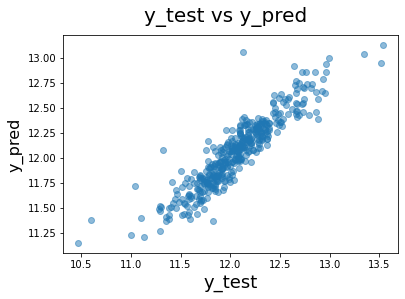

In [116]:
# Plotting y_test and y_pred to understand the spread
y_pred_test = ridge.predict(X_test_rfe)
fig = plt.figure()
plt.scatter(y_test, y_pred_test, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## Evaluation

In [117]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','Adj R2 Score (Train)','RSS (Train)', 'RMSE (Train)',
                      'R2 Score (Test)','Adj R2 Score (Test)','RSS (Test)','RMSE (Test)'], 
        'Linear Regression': lr_metric
        }

lr_metric_col = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric_col = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric_col = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric_col, rg_metric_col, ls_metric_col], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.903,0.879,0.886
1,Adj R2 Score (Train),0.888,0.873,0.868
2,RSS (Train),12.852,15.988,15.146
3,RMSE (Train),0.114018,0.130384,0.126491
4,R2 Score (Test),0.848,0.838,0.844
5,Adj R2 Score (Test),0.776,0.816,0.771
6,RSS (Test),9.96,10.565,10.172
7,RMSE (Test),0.154919,0.161245,0.158114


### Doubling alpha for ridge and lasso

In [118]:
### Doubling Alpha for Lasso
alpha =0.002
lasso_x2 = Lasso(alpha=alpha)
lasso_x2.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [119]:
# total number of coefficients
len(lasso_x2.coef_)

131

In [120]:
# coefficients after lasso regression
len(lasso_x2.coef_[lasso.coef_ != 0])

54

In [121]:

betas = pd.DataFrame(index=[X_train.columns], 
                     columns = ['Lasso', 'Lasso x 2'])
betas['Lasso'] = lasso.coef_ # Lasso Regression
betas['Lasso x 2'] = lasso_x2.coef_ # Lasso Regression

#print top 10 predictors
betas.sort_values(by= 'Lasso', ascending=False)[0:10] 

,Lasso,Lasso x 2
OverallQual,0.071928,0.076602
GarageCars,0.068042,0.066614
SaleType_New,0.064629,0.031633
Neighborhood_NridgHt,0.052716,0.019028
SaleCondition_Normal,0.044369,0.021318
KitchenQual,0.043128,0.042664
MSZoning_FV,0.042676,0.000000
Condition1_Norm,0.042582,0.033950
TotRmsAbvGrd,0.042490,0.045144
FullBath,0.039908,0.024178


In [122]:
y_pred_test = lasso_x2.predict(X_test)
metric_doubled_alpha_lasso = print_model_metrics(X_train, X_test, y_train, y_test, linear_regression)

####Train scores####
----------------------------
R2_train: 0.903
Train Adj R-squared: 0.888
Train RSS: 12.852
Train MSE: 0.013

####Test scores####
----------------------------
R2_test: 0.848
Test Adj R-squared: 0.776
Test RSS: 9.96
Test MSE: 0.024


In [123]:
#doubling alpha for ridge
alpha = 10
ridge_x2 = Ridge(alpha=alpha)
ridge_x2.fit(X_train_rfe, y_train)

Ridge(alpha=10)

In [124]:
betas = pd.DataFrame(index=[X_train_rfe.columns], 
                     columns = ['Ridge', 'Ridge x 2'])
betas['Ridge'] = ridge.coef_ # Lasso Regression
betas['Ridge x 2'] = ridge_x2.coef_ # Lasso Regression
betas.sort_values(by= 'Ridge', ascending=False)[0:10]

,Ridge,Ridge x 2
MSZoning_FV,0.089218,0.063414
Neighborhood_NridgHt,0.089191,0.076266
GarageCars,0.086069,0.084849
OverallQual,0.079347,0.080474
MSZoning_RL,0.074280,0.055088
SaleType_New,0.074167,0.059631
BsmtExposure_Gd,0.073764,0.069547
LotConfig_CulDSac,0.072199,0.067229
GarageType_BuiltIn,0.070199,0.052326
SaleCondition_Normal,0.069245,0.062744


In [125]:
y_pred_test = ridge_x2.predict(X_test_rfe)
metric_doubled_alpha_ridge = print_model_metrics(X_train, X_test, y_train, y_test, linear_regression)

####Train scores####
----------------------------
R2_train: 0.903
Train Adj R-squared: 0.888
Train RSS: 12.852
Train MSE: 0.013

####Test scores####
----------------------------
R2_test: 0.848
Test Adj R-squared: 0.776
Test RSS: 9.96
Test MSE: 0.024


In [126]:
rg_metric_aplhax2 = pd.Series(metric_doubled_alpha_ridge, name = 'Ridge Regression(alpha x 2)')
ls_metric_aplhax2 = pd.Series(metric_doubled_alpha_lasso, name = 'Lasso Regression(alpha x 2)')

final_metric_1 = pd.concat([final_metric, rg_metric_aplhax2, ls_metric_aplhax2], axis = 1)

In [127]:
# print final metric
final_metric_1

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression(alpha x 2),Lasso Regression(alpha x 2)
0,R2 Score (Train),0.903,0.879,0.886,0.903,0.903
1,Adj R2 Score (Train),0.888,0.873,0.868,0.888,0.888
2,RSS (Train),12.852,15.988,15.146,12.852,12.852
3,RMSE (Train),0.114018,0.130384,0.126491,0.114018,0.114018
4,R2 Score (Test),0.848,0.838,0.844,0.848,0.848
5,Adj R2 Score (Test),0.776,0.816,0.771,0.776,0.776
6,RSS (Test),9.96,10.565,10.172,9.96,9.96
7,RMSE (Test),0.154919,0.161245,0.158114,0.154919,0.154919


### Model Lasso without top 5 features
Let's look at the top 5 features from our Lasso model. We will drop these features and calculate Lasso regression again for new features.

In [128]:
lasso_coef = pd.DataFrame(index=[X_train.columns], 
                     columns = ['Lasso'])
lasso_coef['Lasso'] = lasso.coef_ # Lasso Regression
lasso_coef.sort_values(by= 'Lasso', ascending=False)[0:5]
top5 = lasso_coef.sort_values(by= 'Lasso', ascending=False).index[0:5]
top5 = list(top5.get_level_values(0))
lasso_coef.sort_values(by= 'Lasso', ascending=False)[0:5]

,Lasso
OverallQual,0.071928
GarageCars,0.068042
SaleType_New,0.064629
Neighborhood_NridgHt,0.052716
SaleCondition_Normal,0.044369


In [129]:
X_train_q3 = X_train.copy()
X_test_q3 = X_test.copy()
X_train_q3.head()

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
178,63.0,17423,9,5,5,3,5,3,2216,5,2,1,1,5,9,1,3,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1276,0.0,12936,6,6,3,3,3,4,723,3,1,3,1,3,6,1,2,116,37,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
770,0.0,7252,5,5,3,3,4,3,858,3,1,2,1,3,5,0,2,0,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
667,65.0,8125,6,5,3,3,4,3,1408,5,2,3,1,4,7,1,2,42,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1295,70.0,8400,5,5,3,3,3,3,1052,4,1,3,1,3,5,0,1,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [130]:
X_train_q3.drop(top5, axis=1, inplace=True)
X_test_q3.drop(top5, axis=1, inplace=True)

In [131]:
X_train_q3.head()

,LotFrontage,LotArea,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,OpenPorchSF,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
178,63.0,17423,5,5,3,5,3,2216,5,2,1,1,5,9,1,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1276,0.0,12936,6,3,3,3,4,723,3,1,3,1,3,6,1,116,37,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
770,0.0,7252,5,3,3,4,3,858,3,1,2,1,3,5,0,0,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
667,65.0,8125,5,3,3,4,3,1408,5,2,3,1,4,7,1,42,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1295,70.0,8400,5,3,3,3,3,1052,4,1,3,1,3,5,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [132]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_q3 = Lasso()

# cross validation
folds = 5
model_cv_q3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            

model_cv_q3.fit(X_train_q3, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
# Printing the best hyperparameter alpha
print(model_cv_q3.best_params_)

{'alpha': 0.001}


In [134]:
### setting Alpha for Lasso
alpha =0.001
lasso_q3 = Lasso(alpha=alpha)
lasso_q3.fit(X_train_q3, y_train) 

Lasso(alpha=0.001)

In [135]:
lasso_coef = pd.DataFrame(index=[X_train_q3.columns], 
                     columns = ['Lasso'])
lasso_coef['Lasso'] = lasso_q3.coef_ # Lasso Regression
lasso_coef.sort_values(by= 'Lasso', ascending=False)[0:5]

,Lasso
KitchenQual,0.065446
ExterQual,0.063642
MSSubClass_70,0.057441
FullBath,0.055954
TotRmsAbvGrd,0.053649
